- vegetation: https://map.dfg.ca.gov/metadata/ds0984.html
- prescribed fire bunrs: https://map.dfg.ca.gov/metadata/ds0397.html  
- fire perimeter through 2021: https://frap.fire.ca.gov/mapping/gis-data/
- Post-fire Soil Erosion: https://frap.fire.ca.gov/mapping/gis-data/ -- this datafile has issue. abandoned. 
- sequoia groves: https://irma.nps.gov/DataStore/Reference/Profile/2259632 (2017)


**for each dataset, we will need to check**
1. layers. which are important
2. columns. which are important

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gpd
import contextily as cx
import pandas as pd
import fiona
import glob
from pprint import pprint

In [26]:
pprint(glob.glob("/home/ubuntu/climate_seqoia/resources/*/*.gdb"))

['/home/ubuntu/climate_seqoia/resources/perod04_1/perod04_1.gdb',
 '/home/ubuntu/climate_seqoia/resources/fire21_1/fire21_1.gdb',
 '/home/ubuntu/climate_seqoia/resources/fire21_2/fire21_2.gdb',
 '/home/ubuntu/climate_seqoia/resources/ds984/ds984.gdb',
 '/home/ubuntu/climate_seqoia/resources/ds397/ds397.gdb']


# load the reference

In [200]:
states = gpd.read_file('/home/ubuntu/climate_seqoia/resources/ref_map/usa-states-census-2014.shp')
type(states)

<class 'geopandas.geodataframe.GeoDataFrame'>

In [203]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


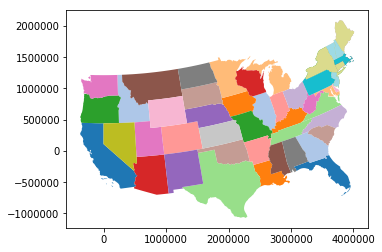

In [209]:
states = states.to_crs("EPSG:3310")
states.plot(cmap = 'tab20')

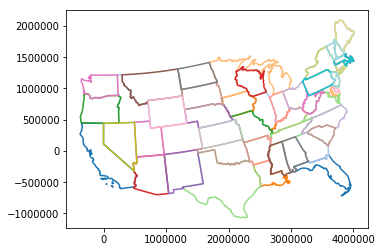

In [208]:
states.boundary.plot(cmap = 'tab20')


In [213]:
cali = states[states['NAME'] == 'California']

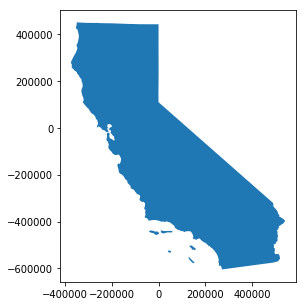

In [214]:
cali.plot(figsize=(5,5), cmap ='tab20')

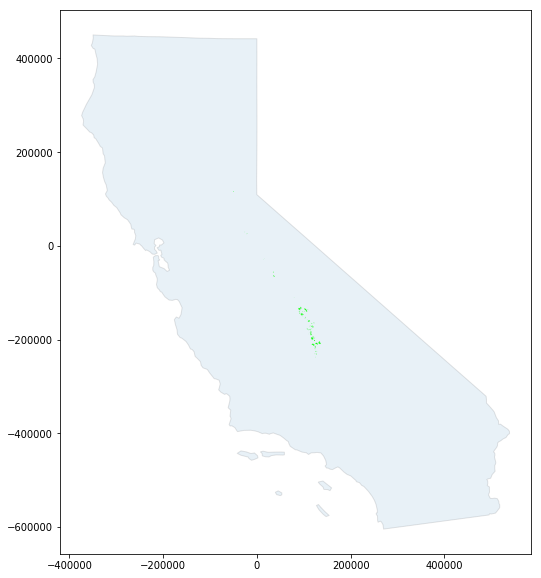

In [219]:
base = cali.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
df.plot(ax=base, color='lime', alpha=.9)

# check the layers

In [11]:
f = "/home/ubuntu/climate_seqoia/resources/CA_SEGI_groves/CA_Sierra_groves.shp"
if len(fiona.listlayers(f))>1:
    print(f, '\n', fiona.listlayers(f))
for f in glob.glob("/home/ubuntu/climate_seqoia/resources/*/*.gdb"):
    if len(fiona.listlayers(f))>1:
        print(f, '\n', fiona.listlayers(f))

/home/ubuntu/climate_seqoia/resources/perod04_1/perod04_1.gdb 
 ['perod04_1', 'VAT_perod04_1', 'fras_aux_perod04_1', 'fras_blk_perod04_1', 'fras_bnd_perod04_1', 'fras_ras_perod04_1']
/home/ubuntu/climate_seqoia/resources/fire21_1/fire21_1.gdb 
 ['firep21_1', 'rxburn21_1', 'Non_RXFire_Legacy13_2']
/home/ubuntu/climate_seqoia/resources/fire21_2/fire21_2.gdb 
 ['firep21_2', 'rxburn21_2', 'Non_RXFire_Legacy13_2']


In [267]:
f = '/home/ubuntu/climate_seqoia/resources/fire21_2/fire21_2.gdb'

In [269]:

print(fiona.listlayers(f))

for l in range(3):
    df = gpd.read_file(f, layer=l)
    print(l,fiona.listlayers(f)[l], df.shape)

['firep21_2', 'rxburn21_2', 'Non_RXFire_Legacy13_2']
0 firep21_2 (21688, 20)
1 rxburn21_2 (8027, 17)
2 Non_RXFire_Legacy13_2 (864, 17)


Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'TREATMENT_ID', 'TREATMENT_NAME',
       'TREATMENT_TYPE', 'START_DATE', 'END_DATE', 'TREATED_AC', 'GIS_ACRES',
       'RX_CONSUM', 'PRE_CON_CLASS', 'POST_CON_CLASS', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')


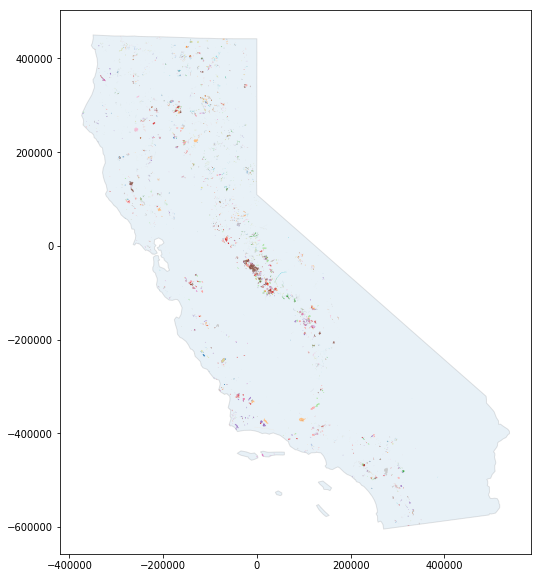

In [285]:
df = gpd.read_file(f, layer=1)
print(df.columns)
base = cali.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
df.plot(ax=base, cmap='tab20', alpha=.9)

Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM', 'Shape_Length',
       'Shape_Area', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'geometry'],
      dtype='object')


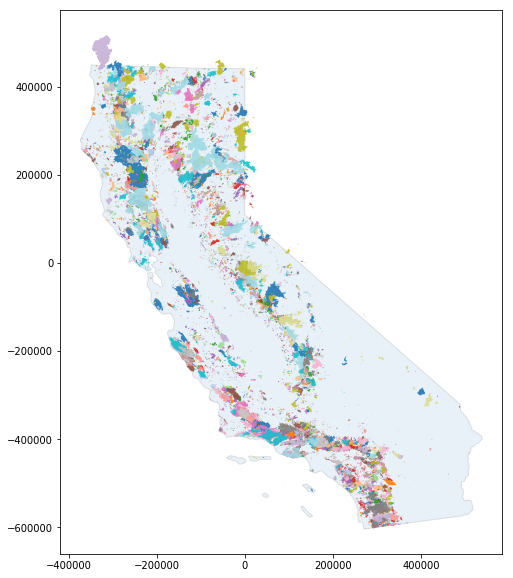

In [286]:
df = gpd.read_file(f, layer=0)
print(df.columns)
base = cali.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
df.plot(ax=base, cmap='tab20', alpha=.9)

Index(['TREATMENT_ID', 'TREATMENT_NAME', 'TREATMENT_TYPE', 'UNIT_ID', 'AGENCY',
       'TREATED_AC', 'GIS_ACRES', 'STATE', 'YEAR_', 'RX_CONSUM',
       'PRE_CON_CLASS', 'POST_CON_CLASS', 'END_DATE', 'START_DATE',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')


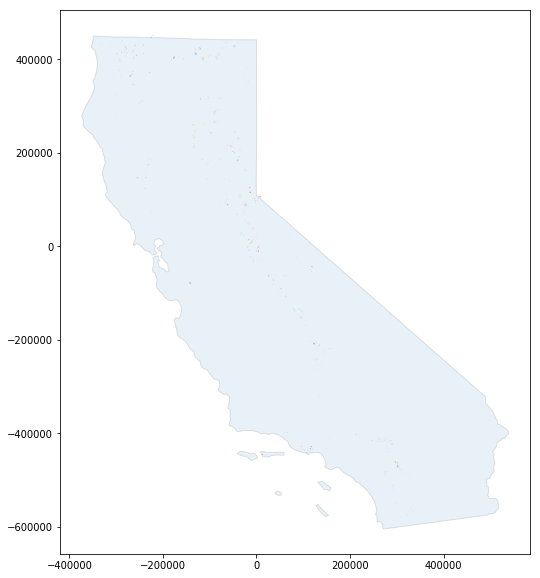

In [287]:
df = gpd.read_file(f, layer=2)
print(df.columns)
base = cali.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
df.plot(ax=base, cmap='tab20', alpha=.9)

In [289]:
df = gpd.read_file(f, layer=0)
df.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,COMPLEX_NAME,COMPLEX_INCNUM,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602280,1.0,1.0,None,3252.523280,4.435447e+05,None,None,"MULTIPOLYGON (((-116841.251 97942.565, -116836..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,None,9653.760308,2.774464e+06,None,None,"MULTIPOLYGON (((-117328.400 90212.407, -117321..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,None,1649.643235,1.104811e+05,None,None,"MULTIPOLYGON (((-115605.059 92988.787, -115585..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931545,1.0,1.0,None,1577.155857,5.233211e+04,None,None,"MULTIPOLYGON (((-110213.270 105975.579, -11020..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315964,1.0,1.0,None,1035.787625,4.174722e+04,None,None,"MULTIPOLYGON (((-111793.600 164243.615, -11177..."


In [195]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

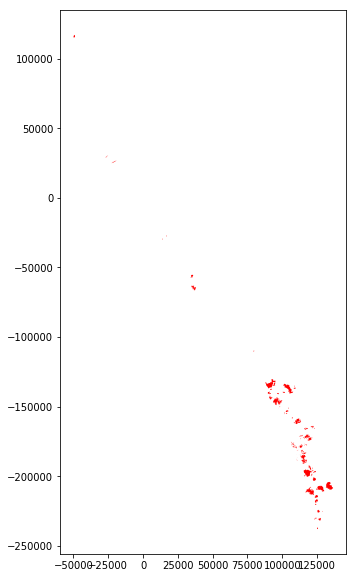

In [192]:
df.plot(figsize = (10,10), color='red')

In [184]:
df.columns

Index(['OBJECTID', 'Grove_Name', 'Shape_Leng', 'Shape_Area', 'Acres',
       'geometry'],
      dtype='object')

In [185]:
df.shape

(80, 6)

In [187]:
df.head()

,OBJECTID,Grove_Name,Shape_Leng,Shape_Area,Acres,geometry
0,1,Abbott,1255.684024,1.005677e+05,25,"POLYGON ((91094.630 -139421.060, 91083.930 -13..."
1,2,Agnew,1728.807964,1.748466e+05,43,"POLYGON ((108999.130 -136334.570, 108996.690 -..."
2,3,Alder Creek,9953.327421,3.758521e+06,929,"POLYGON ((122450.300 -200788.840, 122472.540 -..."
3,4,Atwell,30844.035576,5.418057e+06,1339,"MULTIPOLYGON (((118138.534 -170044.978, 118164..."
4,5,Bearskin,4060.802457,7.586944e+05,187,"POLYGON ((96662.050 -140194.200, 96666.770 -14..."


In [188]:
df.Grove_Name

0                          Abbott
1                           Agnew
2                     Alder Creek
3                          Atwell
4                        Bearskin
5                 Belknap Complex
6     Big Baldy South (Aley 1963)
7                     Big Springs
8                       Big Stump
9                  Black Mountain
10                     Board Camp
11                    Burro Creek
12                         Cahoon
13          Calaveras North Grove
14          Calaveras South Grove
15                  Case Mountain
16                   Castle Creek
17                     Cedar Flat
18                     Cherry Gap
19                    Clough Cave
20               Coffeepot Canyon
21                 Converse Basin
22                     Cunningham
23                     Deer Creek
24                    Deer Meadow
25                       Dennison
26                 Devil's Canyon
27                     Dillonwood
28                       Douglass
29            

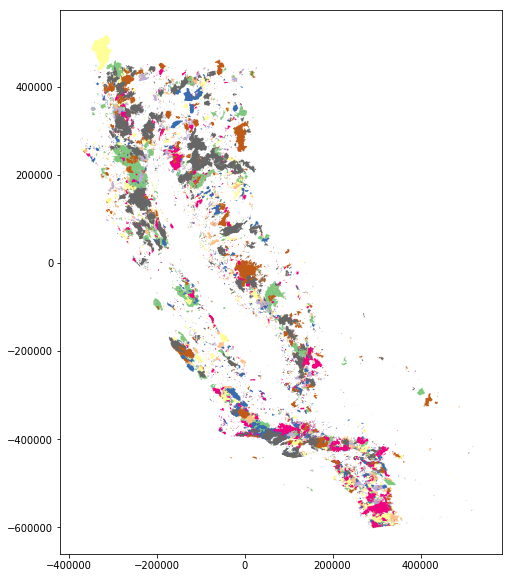

In [86]:
df.plot(figsize = (10,10), cmap = 'Accent')

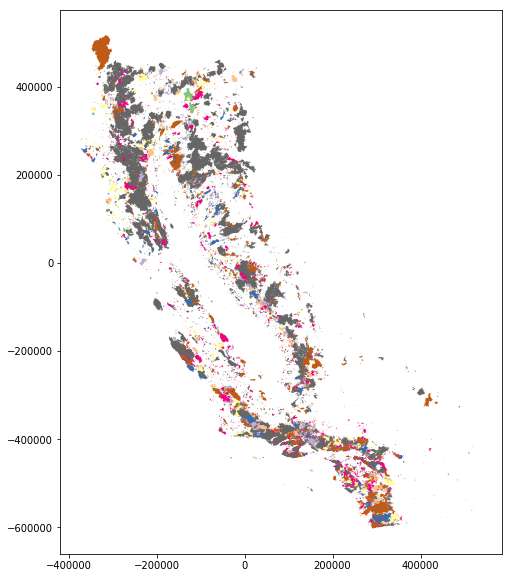

In [85]:
df.plot(column = 'YEAR_', figsize = (10,10), cmap = 'Accent')

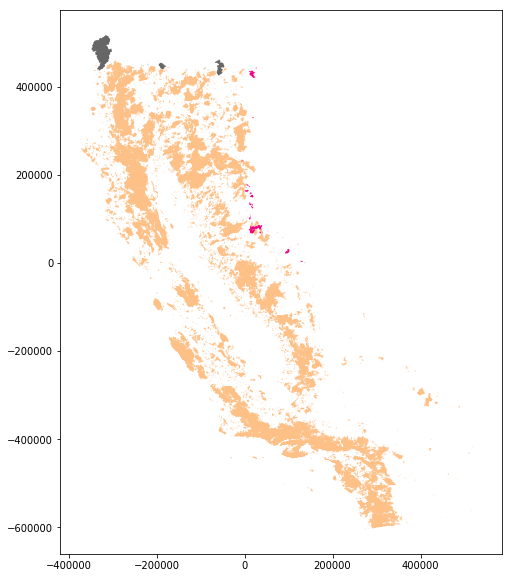

In [89]:
df.plot(column = 'STATE', figsize = (10,10), cmap = 'Accent')

In [99]:
import numpy as np

In [140]:
for j in np.where(pd.isnull(df.YEAR_))[0]:
    df.YEAR_[j] = 0
    
for k,m in enumerate(df.YEAR_):
    try:
        m = int(m)
    except:
        if m == '':
            df.YEAR_[k] = 0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [162]:
df_year = np.array(list(df.YEAR_)).astype(int)


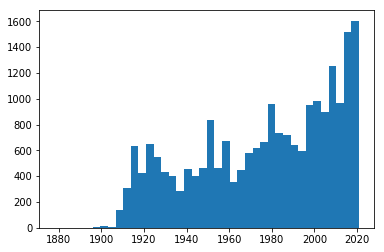

In [164]:
plt.hist(df_year[df_year!=0], bins = 40);

In [158]:
np.array(list(df.YEAR_)).astype(int)

array([2020, 2020, 2020, ..., 2008, 2008, 2021])

In [ ]:
(df.CAUSE).plot('hist')

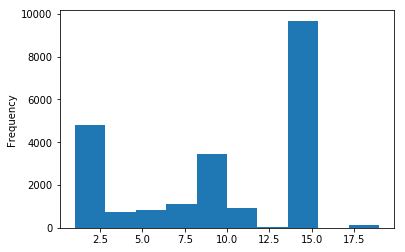

In [94]:
(df.CAUSE).plot('hist')

In [88]:
df.columns

Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM', 'Shape_Length',
       'Shape_Area', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'geometry'],
      dtype='object')

# check the columns. 

In [8]:
df.columns

Index(['RASTER', 'FOOTPRINT_Length', 'FOOTPRINT_Area', 'geometry'], dtype='object')

In [9]:
f = "/home/ubuntu/climate_seqoia/resources/CA_SEGI_groves/CA_Sierra_groves.shp"
df = gpd.read_file(f, layer=0)
print(f, '\n', df.columns)
for f in glob.glob("/home/ubuntu/climate_seqoia/resources/*/*.gdb"):
    df = gpd.read_file(f, layer=0)
    print(f, df.columns)

/home/ubuntu/climate_seqoia/resources/CA_SEGI_groves/CA_Sierra_groves.shp 
 Index(['OBJECTID', 'Grove_Name', 'Shape_Leng', 'Shape_Area', 'Acres',
       'geometry'],
      dtype='object')
/home/ubuntu/climate_seqoia/resources/perod04_1/perod04_1.gdb Index(['RASTER', 'FOOTPRINT_Length', 'FOOTPRINT_Area', 'geometry'], dtype='object')
/home/ubuntu/climate_seqoia/resources/fire21_1/fire21_1.gdb Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')
/home/ubuntu/climate_seqoia/resources/fire21_2/fire21_2.gdb Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM', 'Shape_Length',
       'Shape_Area', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'geometry'],


In [186]:
fire21_1.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602280,1.0,1.0,None,3252.523280,4.435447e+05,"MULTIPOLYGON (((-116841.251 97942.565, -116836..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,None,9653.760308,2.774464e+06,"MULTIPOLYGON (((-117328.400 90212.407, -117321..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,None,1649.643235,1.104811e+05,"MULTIPOLYGON (((-115605.059 92988.787, -115585..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931545,1.0,1.0,None,1577.155857,5.233211e+04,"MULTIPOLYGON (((-110213.270 105975.579, -11020..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315964,1.0,1.0,None,1035.787625,4.174722e+04,"MULTIPOLYGON (((-111793.600 164243.615, -11177..."


In [169]:
fiona.listlayers('/home/ubuntu/climate_seqoia/resources/ds984/ds984.gdb/') 

['ds984']

In [93]:
fire21_1

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602280,1.0,1.0,None,3.252523e+03,4.435447e+05,"MULTIPOLYGON (((-116841.251 97942.565, -116836..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,None,9.653760e+03,2.774464e+06,"MULTIPOLYGON (((-117328.400 90212.407, -117321..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,None,1.649643e+03,1.104811e+05,"MULTIPOLYGON (((-115605.059 92988.787, -115585..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931545,1.0,1.0,None,1.577156e+03,5.233211e+04,"MULTIPOLYGON (((-110213.270 105975.579, -11020..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315964,1.0,1.0,None,1.035788e+03,4.174722e+04,"MULTIPOLYGON (((-111793.600 164243.615, -11177..."
5,2020,CA,CDF,NEU,PFE,00014858,2020-07-05T00:00:00+00:00,2020-07-05T00:00:00+00:00,14.0,,36.0,36.701931,1.0,1.0,None,2.348114e+03,1.485274e+05,"MULTIPOLYGON (((-120045.470 80129.456, -120048..."
6,2020,CA,DOD,BEA,VALLEY,00015865,2020-07-15T00:00:00+00:00,2020-07-16T00:00:00+00:00,14.0,Beale Air Force Base,377.0,376.910400,1.0,1.0,None,7.596640e+03,1.525302e+06,"MULTIPOLYGON (((-118955.900 122883.508, -11896..."
7,2020,CA,CDF,NEU,WALDO,00015275,2020-07-09T00:00:00+00:00,2020-07-12T00:00:00+00:00,9.0,,10.7,10.102212,1.0,1.0,None,1.104878e+03,4.088220e+04,"MULTIPOLYGON (((-112652.018 124969.407, -11265..."
8,2020,CA,CDF,NEU,WILLOW,00006064,2020-03-10T00:00:00+00:00,2020-03-11T00:00:00+00:00,5.0,,34.0,33.973888,1.0,1.0,None,1.912359e+03,1.374875e+05,"MULTIPOLYGON (((-113301.902 154794.699, -11329..."
9,2020,CA,CDF,NEU,WILLOWS,00021423,2020-09-09T00:00:00+00:00,2020-10-13T00:00:00+00:00,7.0,,1311.0,1309.089966,3.0,1.0,None,1.175846e+04,5.297699e+06,"MULTIPOLYGON (((-115235.522 152583.198, -11523..."


In [94]:
fire21_1.shape

(21686, 18)

In [164]:
fire21_1.listlayers() 

AttributeError: 'GeoDataFrame' object has no attribute 'listlayers'

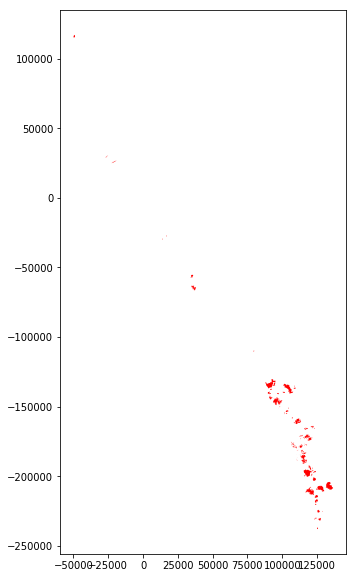

In [163]:
sierra_groves = gpd.read_file('/home/ubuntu/climate_seqoia/resources/CA_SEGI_groves/CA_Sierra_groves.shp', layer=0)
sierra_groves.plot(color='red', alpha=1,figsize = (10,10))

In [49]:
seq = pd.read_csv('/home/ubuntu/climate_seqoia/resources/sequoia_BIOS.csv')

In [52]:
seq.shape

(126, 21)

In [55]:
seq.columns[0]

'OBJECTID-esriFieldTypeOID'

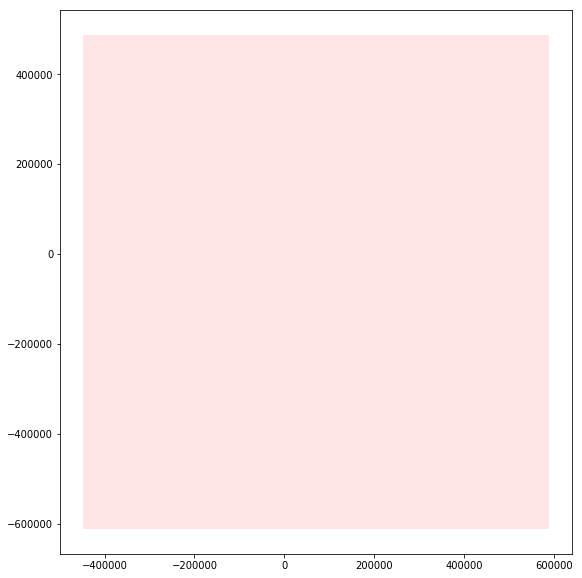

In [30]:
perod04_1 = gpd.read_file('/home/ubuntu/climate_seqoia/resources/perod04_1/perod04_1.gdb/', layer=0)
perod04_1.plot(color='red', alpha=.1,figsize = (10,10))

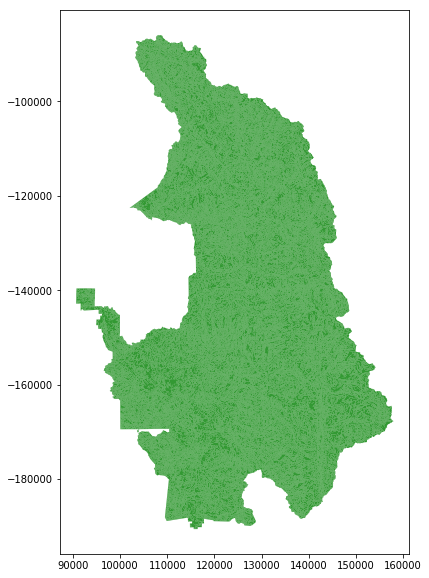

In [44]:
veggie = gpd.read_file('/home/ubuntu/climate_seqoia/resources/ds984/ds984.gdb/', layer=0)
veggie.plot(color='green', alpha=.8,figsize = (10,10))

In [57]:
veggie.columns

Index(['NVCSName', 'NVCSLevel', 'MapClass', 'MapClassID', 'Poly_ID',
       'X_Centroid', 'Y_Centroid', 'CALVEGName', 'CALVEGCode', 'CWHRType',
       'CWHRCode', 'GlobalRank', 'StateRank', 'Rare', 'CaCode', 'NVCSAlliance',
       'NVCSGroup', 'NVCSMG', 'Acres', 'Hectares', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')

In [87]:
seq_map = pd.DataFrame()
for m in seq['Poly_ID-esriFieldTypeInteger']:
    seq_map = foo.append(veggie[veggie['Poly_ID'] == m])

In [88]:
seq_map

,NVCSName,NVCSLevel,MapClass,MapClassID,Poly_ID,X_Centroid,Y_Centroid,CALVEGName,CALVEGCode,CWHRType,...,Rare,CaCode,NVCSAlliance,NVCSGroup,NVCSMG,Acres,Hectares,Shape_Length,Shape_Area,geometry
36932,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,36933,323317.314971,4.069043e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,57.235042,23.162200,3244.103844,2.316291e+05,"MULTIPOLYGON (((90938.260 -139832.459, 90934.5..."
36936,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,36937,323104.557292,4.068774e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,28.240602,11.428566,2971.454755,1.142890e+05,"MULTIPOLYGON (((90925.657 -140368.954, 90925.8..."
37421,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,37422,323771.264936,4.068541e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,85.374051,34.549652,5457.055969,3.455085e+05,"MULTIPOLYGON (((91803.918 -140293.413, 91809.9..."
37447,Sequoiadendron giganteum,Alliance,Giant Sequoia Forest Alliance,4020,37448,323385.515554,4.068437e+06,Big Tree (Giant Sequoia),BT,Sierra Mixed Conifer,...,Yes,86.200.00,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,15.816870,6.400860,1442.337106,6.401061e+04,"MULTIPOLYGON (((91245.346 -140748.142, 91241.7..."
38939,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,38940,323115.601352,4.067028e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,4.910917,1.987378,782.838861,1.987436e+04,"MULTIPOLYGON (((90972.750 -142358.854, 90967.7..."
38942,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,38943,323644.955835,4.066884e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,8.027592,3.248651,969.239738,3.248761e+04,"MULTIPOLYGON (((91510.502 -142384.712, 91519.5..."
39419,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,39420,323336.732002,4.066740e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,6.224614,2.519012,945.196292,2.519090e+04,"MULTIPOLYGON (((91187.272 -142347.066, 91192.9..."
39932,Sequoiadendron giganteum,Alliance,Giant Sequoia Forest Alliance,4020,39933,324389.274295,4.065525e+06,Big Tree (Giant Sequoia),BT,Sierra Mixed Conifer,...,Yes,86.200.00,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,142.828809,57.800768,12346.149425,5.780309e+05,"MULTIPOLYGON (((92046.927 -143114.609, 92052.3..."
40449,Sequoiadendron giganteum-Pinus lambertiana/Cor...,Association,Giant Sequoia-Sugar Pine/Pacific Dogwood Fores...,4021,40450,329355.923876,4.062834e+06,Mixed Conifer - Giant Sequoia,MB,Sierra Mixed Conifer,...,Yes,86.200.01,Sequoiadendron giganteum,Californian montane conifer forest,Californian–Vancouverian Montane and Foothill ...,1937.268723,783.984837,74094.578278,7.840495e+06,"MULTIPOLYGON (((96189.879 -143553.482, 96191.0..."


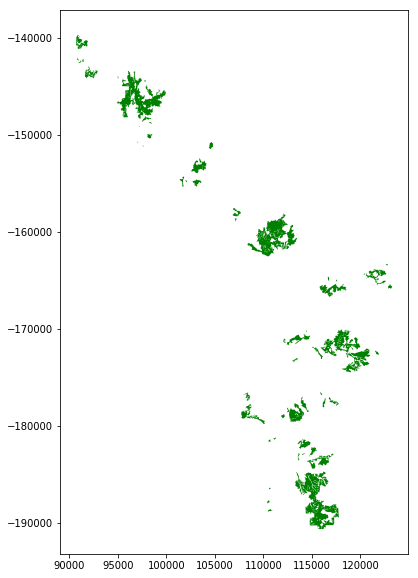

In [89]:
seq_map.plot(color='green', alpha=1,figsize = (10,10))

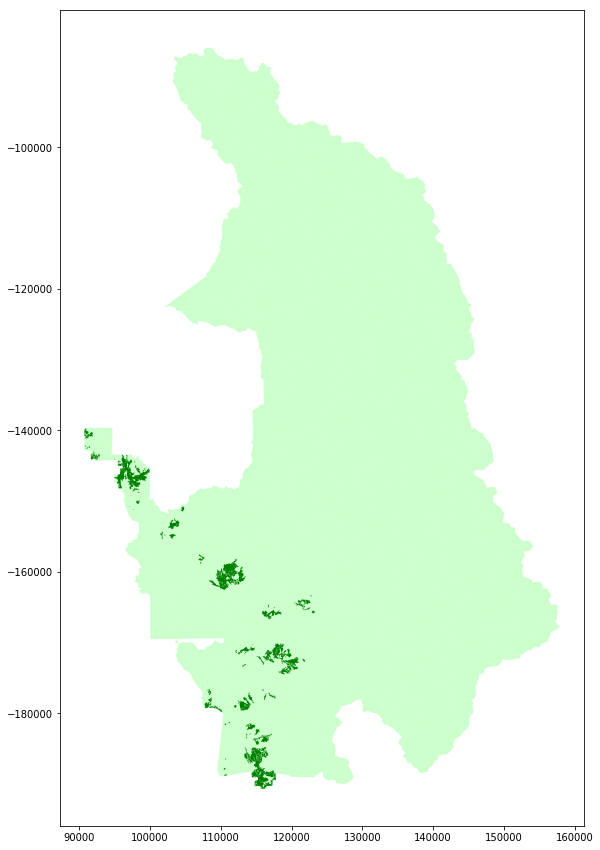

In [91]:
fig, ax = plt.subplots(figsize=(15, 15))
veggie.plot(ax=ax,color='lime', alpha=.2,figsize = (10,10))
# fire21_1.plot(ax=ax, alpha=0.7, color="red")
seq_map.plot(ax=ax, color="green")


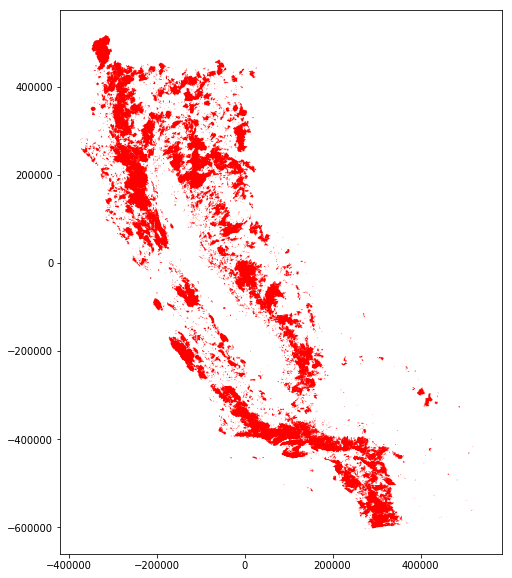

In [32]:

fire21_1 = gpd.read_file('/home/ubuntu/climate_seqoia/resources/fire21_1/fire21_1.gdb/', layer=0)
fire21_1.plot(color='red', alpha=1,figsize = (10,10))

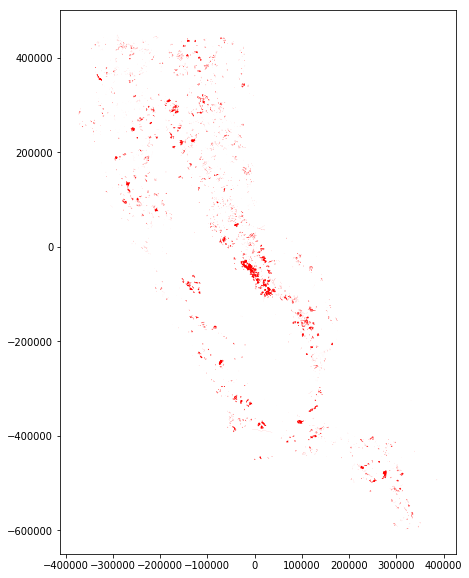

In [33]:
ds397 = gpd.read_file('/home/ubuntu/climate_seqoia/resources/ds397/ds397.gdb/', layer=0)
ds397.plot(color='red', alpha=1,figsize = (10,10))

presribed_start_time = pd.to_datetime(ds397['START_DATE']).dt.year
ds397['start_year'] = presribed_start_time
print(presribed_start_time)

In [34]:
fire21_1.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
ds397.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

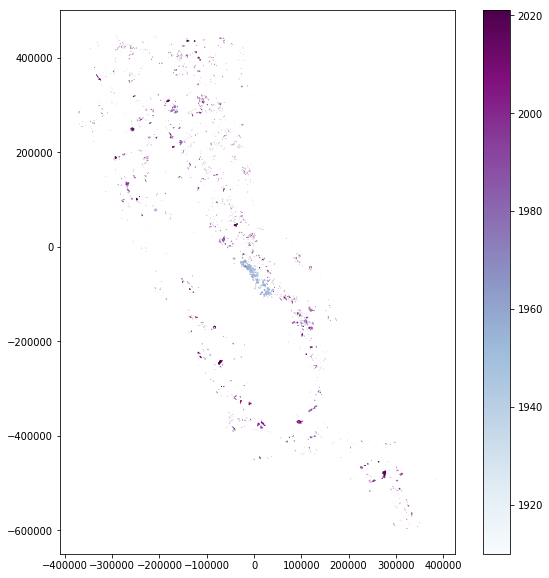

In [158]:
fig, ax = plt.subplots(figsize=(10,10))
# ds397.plot(ax=ax, alpha=1,color="blue", legend = True)
ds397.plot(ax=ax, legend = True, column = 'start_year', cmap = 'BuPu')
# ax.legend()

In [135]:
import numpy as np
len(np.unique(list(presribed_start_time)))

1149

In [136]:
(np.unique(list(presribed_start_time)))

array([1910., 1911., 1912., ...,   nan,   nan,   nan])

In [150]:
np.isnan(np.array(list(presribed_start_time))).sum()

1063

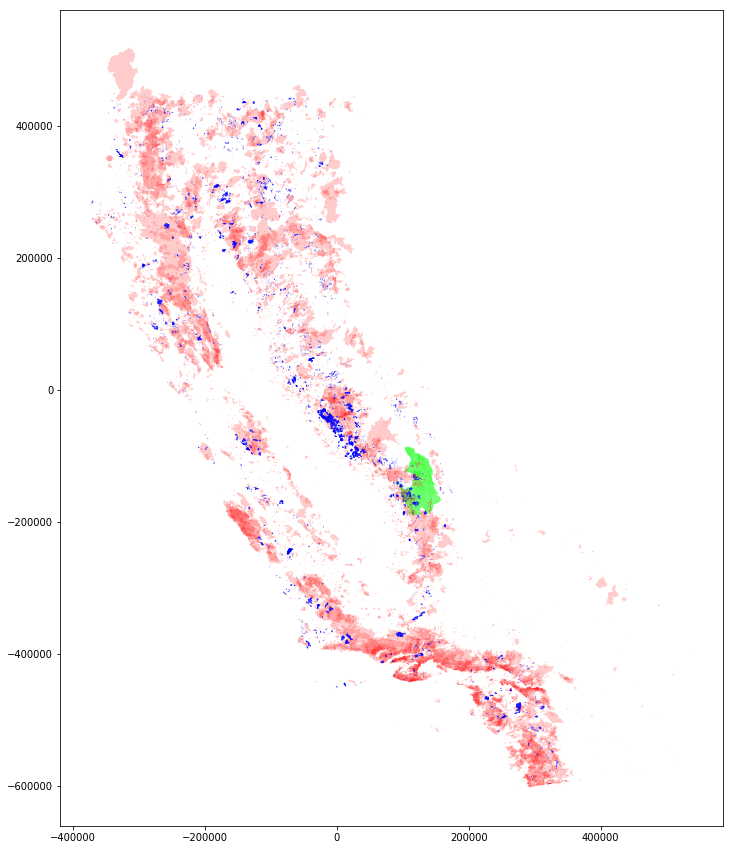

In [160]:
fig, ax = plt.subplots(figsize=(15, 15))
veggie.plot(ax=ax,alpha=.5,color='lime',figsize = (10,10))
seq_map.plot(ax=ax, alpha=0.9, color="green")
fire21_1.plot(ax=ax, alpha=0.2, color="red")
ds397.plot(ax=ax, alpha=0.9,color="blue")

In [ ]:
veggie.plot(color='lime', alpha=.2,figsize = (10,10))
# fire21_1.plot(ax=ax, alpha=0.7, color="red")


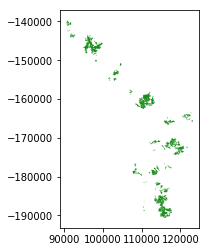

In [98]:
seq_map.plot(alpha=0.9, color="green")

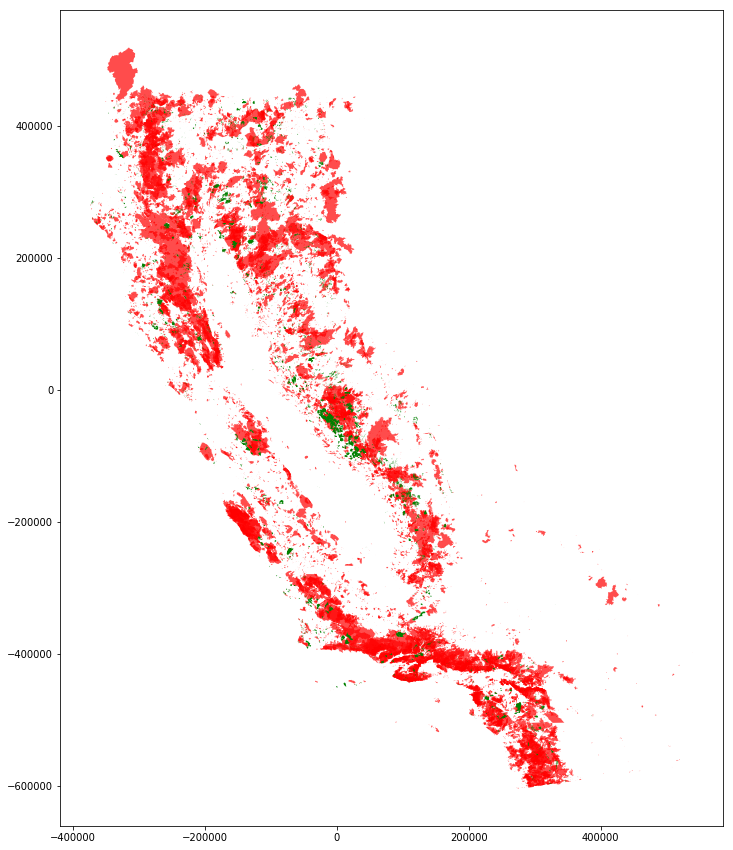

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))
fire21_1.plot(ax=ax, alpha=0.7, color="red")
ds397.plot(ax=ax, color="green")

In [40]:
type(ds397)

geopandas.geodataframe.GeoDataFrame

In [42]:
ds397.head()

,YEAR_,STATE,AGENCY,UNIT_ID,TREATMENT_ID,TREATMENT_NAME,TREATMENT_TYPE,START_DATE,END_DATE,TREATED_AC,GIS_ACRES,RX_CONSUM,PRE_CON_CLASS,POST_CON_CLASS,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,AEU,10509,Jan 31 2020 Broadcast,3.0,2020-01-31T00:00:00+00:00,2020-01-31T00:00:00+00:00,15.0,15.047045,NaN,NaN,NaN,1365.887529,60893.216906,"MULTIPOLYGON (((-45261.902 81865.442, -45248.3..."
1,2020,CA,PVT,AEU,10572,2020 Fuels Reduction,3.0,2020-02-13T00:00:00+00:00,2020-02-13T00:00:00+00:00,22.3,36.739716,NaN,NaN,NaN,2681.610336,148680.293398,"MULTIPOLYGON (((-57222.192 98500.043, -57231.6..."
2,2020,CA,CDF,AEU,10630,Feb 2020 Broadcast,3.0,2020-02-13T00:00:00+00:00,2020-02-18T00:00:00+00:00,22.4,38.839848,NaN,NaN,NaN,3918.219956,157179.228865,"MULTIPOLYGON (((-49821.237 54143.575, -49815.4..."
3,2020,CA,CDF,AEU,10639,Feb 2020 Broadcast,3.0,2020-02-11T00:00:00+00:00,2020-02-20T00:00:00+00:00,75.5,75.502464,NaN,NaN,NaN,3918.834462,305529.980211,"MULTIPOLYGON (((-47052.539 80922.773, -47052.5..."
4,2020,CA,CDF,AEU,10780,Mar 3 2020 Broadcast,3.0,2020-03-03T00:00:00+00:00,2020-03-03T00:00:00+00:00,61.8,61.773609,NaN,NaN,NaN,2769.034316,249980.461716,"MULTIPOLYGON (((-47591.189 80696.956, -47590.2..."


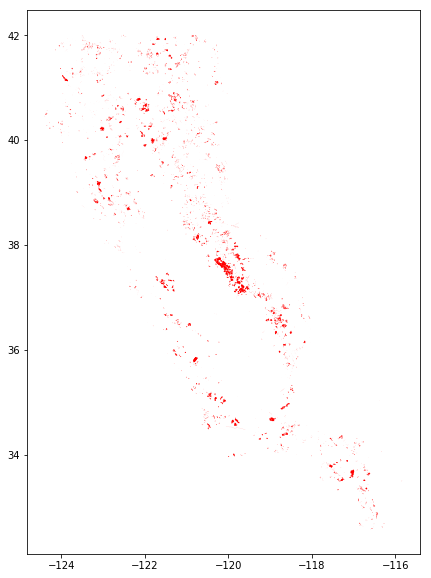

In [18]:
ds397.plot(color='red', alpha=1,figsize = (10,10))

In [3]:
type(ds397)

geopandas.geodataframe.GeoDataFrame

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# states = gpd.read_file('data/usa-states-census-2014.shp')
# type(states)
us = world[(world['name'] == 'United States of America')]


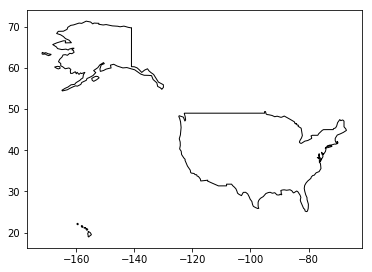

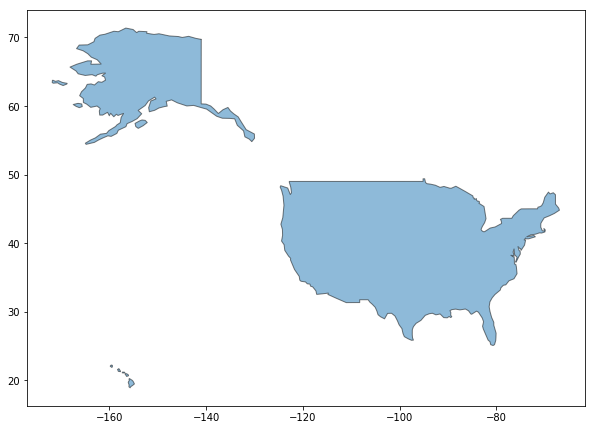

In [6]:
base = us.plot(color='white', edgecolor='black', figsize=(6,6));
base = us.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [7]:
us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

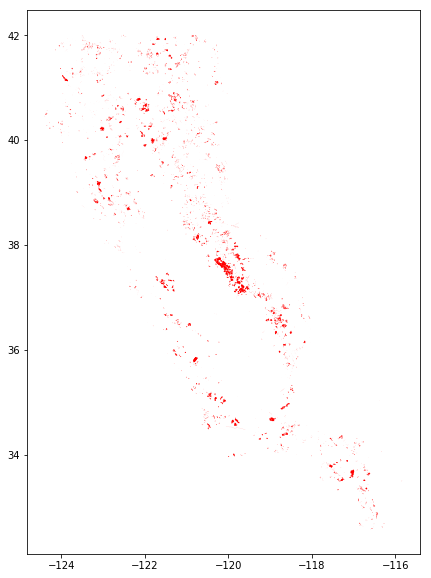

In [17]:
ds397 = ds397.to_crs(us.crs)
ds397.plot(color='red', alpha=1,figsize = (10,10))

In [ ]:
ads397.plot(color='red', alpha=1,figsize = (10,10))

In [9]:
ds397.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

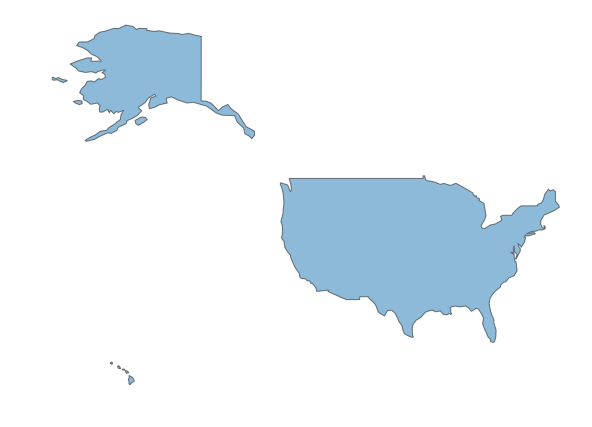

In [12]:
ax = us.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# cx.add_basemap(ax)
ax.set_axis_off()


In [16]:

ds397.plot(ax=ax,color='red', alpha=1,figsize = (10,10))
# mallard_0.plot(ax=base, color='red', alpha=.5)
# mallard_1.plot(ax=base, color='blue', alpha=.5)
# plt.show()

<Figure size 432x288 with 0 Axes>

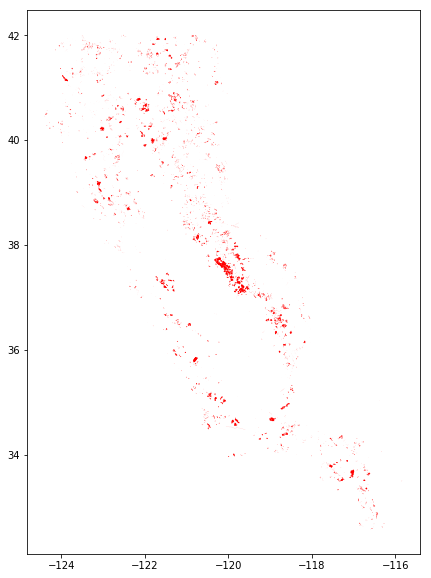

In [31]:
ads397.plot(color='red', alpha=1,figsize = (10,10))

In [32]:
ds397.plot??

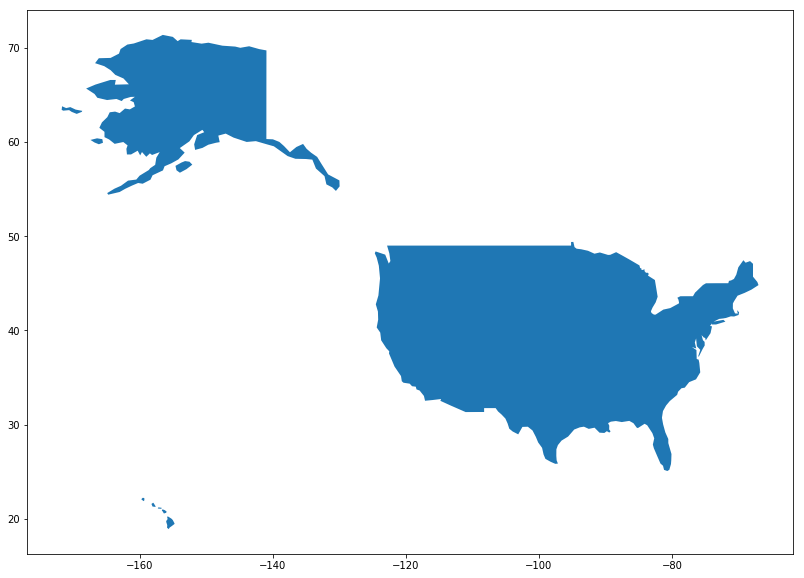

In [29]:

us.plot(figsize = (20,10))

